In [1]:
from GammatoneFilter import GammatoneFilterbank
from PMF import PMF
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import IPython.display as ipd

In [2]:
num_filters = 10
sample_rate = 16000
low_freq = 0
high_freq = sample_rate // 2
num_fft = 512

In [3]:
gfb = GammatoneFilterbank(
    num_filters=num_filters,
    sample_rate=sample_rate,
    low_freq=low_freq,
    high_freq=high_freq,
    num_fft=num_fft,
    with_inverse=True
    )

In [4]:
time_domain_filters = gfb.filters
N = gfb.num_filters
fs = gfb.sample_rate
nfft = gfb.num_fft

# Split out the normal vs. inverted sets (10 first are normal, 10 last are inverted)
normal_filters = time_domain_filters[:N]
inverted_filters = time_domain_filters[N:]

print("Number of normal filters: ", normal_filters.shape[0])
print("Number of inverted filters: ", inverted_filters.shape[0])

Number of normal filters:  10
Number of inverted filters:  10


In [5]:
TRAIN_FILES_PATH = "/Users/guyperets/Documents/MSc/Datasets/ASVSpoof2019/LA/ASVspoof2019_LA_train/flac"
PROTOCOL_TRAIN = "/Users/guyperets/Documents/MSc/Datasets/ASVSpoof2019/LA/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.train.trn.txt"
NUM_BINS = 2**16
HIST_EDGES = (-1, 1)
pmf_t = PMF(TRAIN_FILES_PATH, PROTOCOL_TRAIN)

Loaded 25380 FLAC files.
Number of Bonafide samples: 2580
Number of Spoofed samples: 22800
Attacks: ['A01', 'A02', 'A03', 'A04', 'A05', 'A06']


# Only for bonafide files(currently for testing)

In [6]:
import os 
from scipy.io.wavfile import write
# Create Filtered Dataset by loading the bonafide files and filter them, then save in a new folder
for file in pmf_t.bonafide_files:
    signal, fs = sf.read(file)
    filtered_signals = gfb.filter_signal(signal) # returns the filtered signals through all gammatone and inverse gammatone filters
    assert filtered_signals.shape[0] == 20
    for i, filtered_signal in enumerate(filtered_signals):
        filtered_signal = np.clip(filtered_signal, -1, 1).astype(np.float32)
        # Save each filtered signal in a new folder called "Filtered_gam_X" and "Filtered_invgam_X"
        # where X is the filter number
        # Create the folder if it doesn't exist
        folder = f"Filtered_gam_{i+1}" if i < 10 else f"Filtered_invgam_{i-9}"
        if not os.path.exists(folder):
            os.makedirs(folder)
        write(f"{folder}/{os.path.basename(file)}", fs, filtered_signal)
        # display(ipd.Audio(filtered_signal, rate=fs))
        # # Plot the filtered signal
        # plt.figure(figsize=(10, 4))
        # plt.plot(filtered_signal)
        # plt.title(f"Filtered Signal {i} - {os.path.basename(file)}")
        # plt.xlabel("Sample")
        # plt.ylabel("Amplitude")
        # plt.grid()
        # plt.show()
        

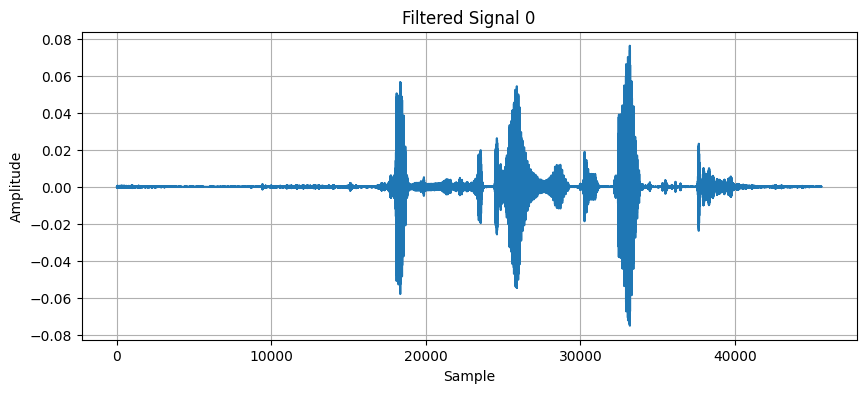

In [8]:
TEST_FILE_FILTERED = "/Users/guyperets/Documents/MSc/PythonNotebooks/MatanPythonConversion/GuyPythonConversion/Filtered_gam_1/LA_T_1000406.flac"
signal, fs = sf.read(TEST_FILE_FILTERED)
plt.figure(figsize=(10, 4))
plt.plot(signal)
plt.title(f"Filtered Signal 0")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

display(ipd.Audio(signal, rate=fs))